___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Lab - 3 (RNN) <br><br>Assignment-3 Solution<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Indest Data

In [2]:
df = pd.read_csv('../data&resources/Frozen_Dessert_Production.csv',
                 index_col='DATE',
                 parse_dates=True
                )

# Exploratory Data Analysis and Visualization

In [3]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [5]:
df.columns = ['Production']

In [6]:
df.head()

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


<AxesSubplot:xlabel='DATE'>

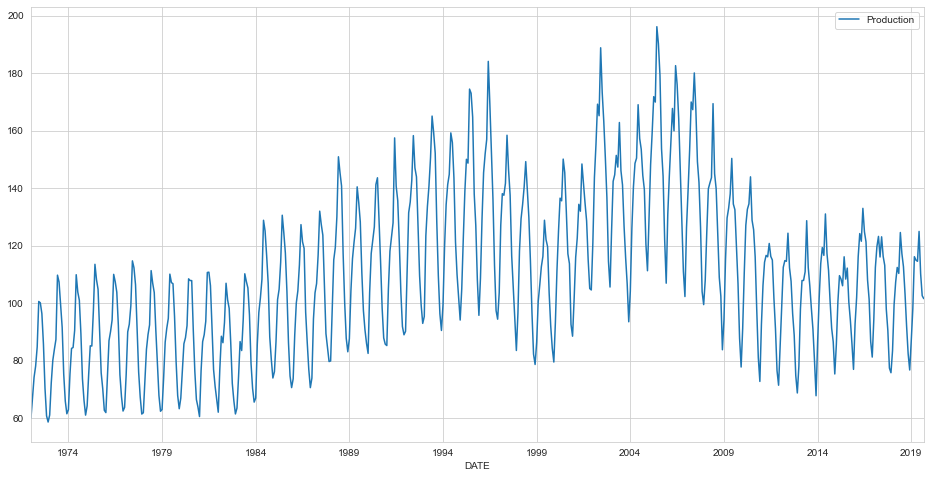

In [7]:
df.plot(figsize=(16,8))

# Preprocessing of Data

## Train Test Split

In [8]:
test_size = 24

In [9]:
test_ind = len(df)- test_size

In [10]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

## Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [14]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [15]:
# help(TimeseriesGenerator)

In [16]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [17]:
X, y = generator[0]

In [18]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


# Modelling & Model Performance

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
n_features = train_scaled.shape[1]

## with "tanh" activation function

In [21]:
model = Sequential()
model.add(LSTM(64, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'tanh', return_sequences=True))
model.add(LSTM(16, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 64)            16896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 12, 32)            12416     
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 32,465
Trainable params: 32,465
Non-trainable params: 0
_________________________________________________________________


In [23]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [24]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 12s 16ms/step - loss: 0.0290 - val_loss: 0.0060
Epoch 2/20
537/537 [==============================] - 7s 13ms/step - loss: 0.0127 - val_loss: 0.0020
Epoch 3/20
537/537 [==============================] - 7s 13ms/step - loss: 0.0083 - val_loss: 0.0014
Epoch 4/20
537/537 [==============================] - 7s 13ms/step - loss: 0.0063 - val_loss: 0.0027
Epoch 5/20
537/537 [==============================] - 7s 13ms/step - loss: 0.0058 - val_loss: 0.0018
Epoch 6/20
537/537 [==============================] - 7s 13ms/step - loss: 0.0052 - val_loss: 0.0019
Epoch 7/20
537/537 [==============================] - 7s 14ms/step - loss: 0.0047 - val_loss: 0.0029
Epoch 8/20
537/537 [==============================] - 7s 13ms/step - loss: 0.0049 - val_loss: 0.0022


<AxesSubplot:>

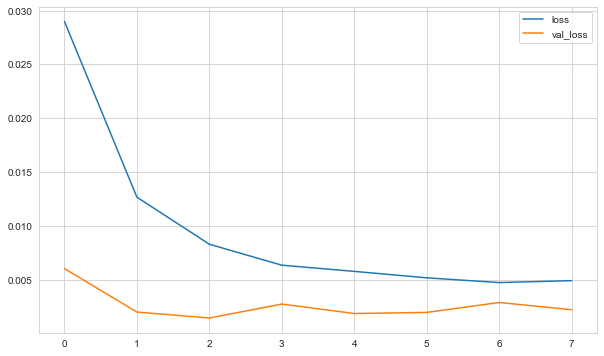

In [25]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [28]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

### Inverse Transformation and Comparing

In [29]:
predictions = scaler.inverse_transform(predictions_scaled)

In [30]:
compare = test[:12]
compare['Predictions_tanh'] = predictions
compare

,Production,Predictions_tanh
DATE,,
2017-10-01,90.473,91.638
2017-11-01,77.438,85.255
2017-12-01,75.812,89.693
2018-01-01,83.434,103.209
2018-02-01,99.490,115.291
2018-03-01,107.315,121.012
2018-04-01,112.431,123.987
2018-05-01,110.354,123.956
2018-06-01,124.584,124.491


<AxesSubplot:xlabel='DATE'>

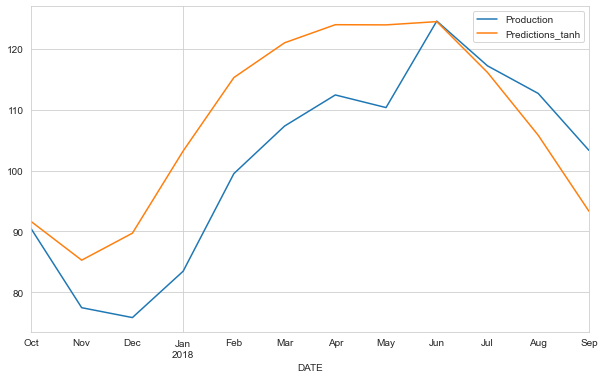

In [31]:
compare.plot()

In [32]:
eval_metrics(compare.Production, compare.Predictions_tanh)

r2_score: 0.4520520028658085 
mae: 9.613018668738503 
mse: 129.21747264135158 
rmse: 11.367386359289085


## with "relu" activation function

In [33]:
model = Sequential()
model.add(LSTM(64, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 12, 64)            16896     
_________________________________________________________________
lstm_4 (LSTM)                (None, 12, 32)            12416     
_________________________________________________________________
lstm_5 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 32,465
Trainable params: 32,465
Non-trainable params: 0
_________________________________________________________________


In [35]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [36]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 9s 12ms/step - loss: 0.0332 - val_loss: 0.0079
Epoch 2/20
537/537 [==============================] - 6s 11ms/step - loss: 0.0152 - val_loss: 0.0018
Epoch 3/20
537/537 [==============================] - 6s 11ms/step - loss: 0.0080 - val_loss: 0.0016
Epoch 4/20
537/537 [==============================] - 6s 10ms/step - loss: 0.0072 - val_loss: 0.0014
Epoch 5/20
537/537 [==============================] - 6s 11ms/step - loss: 0.0074 - val_loss: 0.0017
Epoch 6/20
537/537 [==============================] - 6s 10ms/step - loss: 0.0063 - val_loss: 0.0030
Epoch 7/20
537/537 [==============================] - 6s 11ms/step - loss: 0.0071 - val_loss: 0.0018
Epoch 8/20
537/537 [==============================] - 6s 11ms/step - loss: 0.0067 - val_loss: 0.0025
Epoch 9/20
537/537 [==============================] - 6s 11ms/step - loss: 0.0067 - val_loss: 0.0022


<AxesSubplot:>

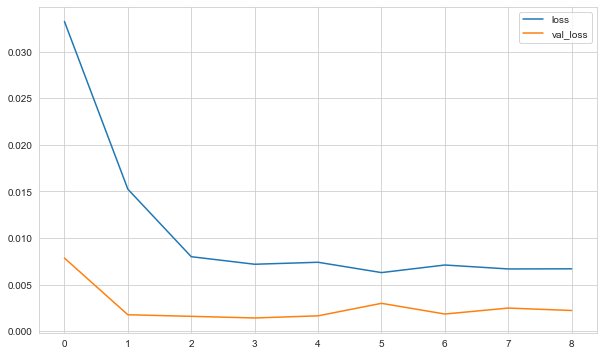

In [37]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [38]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

### Inverse Transformation and Comparing

In [39]:
predictions = scaler.inverse_transform(predictions_scaled)

In [40]:
compare['Predictions_relu'] = predictions
compare

,Production,Predictions_tanh,Predictions_relu
DATE,,,
2017-10-01,90.473,91.638,101.188
2017-11-01,77.438,85.255,88.270
2017-12-01,75.812,89.693,88.087
2018-01-01,83.434,103.209,102.171
2018-02-01,99.490,115.291,115.164
2018-03-01,107.315,121.012,120.216
2018-04-01,112.431,123.987,120.845
2018-05-01,110.354,123.956,119.585
2018-06-01,124.584,124.491,122.226


<AxesSubplot:xlabel='DATE'>

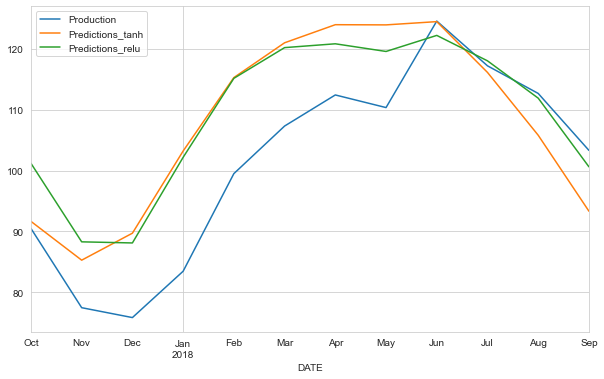

In [41]:
compare.plot()

In [42]:
eval_metrics(compare.Production, compare.Predictions_relu)

r2_score: 0.5349042898395868 
mae: 8.786442102622859 
mse: 109.67918948072212 
rmse: 10.472783272880333


# Retrain and Forecasting

In [43]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [44]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [46]:
model = Sequential()

model.add(LSTM(64, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=10)

Epoch 1/10
561/561 [==============================] - 9s 11ms/step - loss: 0.0304
Epoch 2/10
561/561 [==============================] - 6s 11ms/step - loss: 0.0113
Epoch 3/10
561/561 [==============================] - 6s 11ms/step - loss: 0.0077
Epoch 4/10
561/561 [==============================] - 6s 11ms/step - loss: 0.0071
Epoch 5/10
561/561 [==============================] - 6s 10ms/step - loss: 0.0068
Epoch 6/10
561/561 [==============================] - 6s 10ms/step - loss: 0.0069
Epoch 7/10
561/561 [==============================] - 7s 12ms/step - loss: 0.0068
Epoch 8/10
561/561 [==============================] - 7s 12ms/step - loss: 0.0064
Epoch 9/10
561/561 [==============================] - 6s 11ms/step - loss: 0.0064
Epoch 10/10
561/561 [==============================] - 6s 10ms/step - loss: 0.0062


In [47]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [48]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[ 92.83561735],
       [ 82.79127921],
       [ 80.29346321],
       [ 89.26199455],
       [102.55922568],
       [117.78580273],
       [117.79752368],
       [120.61728051],
       [125.85027398],
       [113.35739906],
       [105.88845032],
       [103.87271774]])

In [49]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [50]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

https://stackoverflow.com/questions/35339139/what-values-are-valid-in-pandas-freq-tags

In [51]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])
forecast_df

,Forecast
2019-10-01,92.836
2019-11-01,82.791
2019-12-01,80.293
2020-01-01,89.262
2020-02-01,102.559
2020-03-01,117.786
2020-04-01,117.798
2020-05-01,120.617
2020-06-01,125.850
2020-07-01,113.357


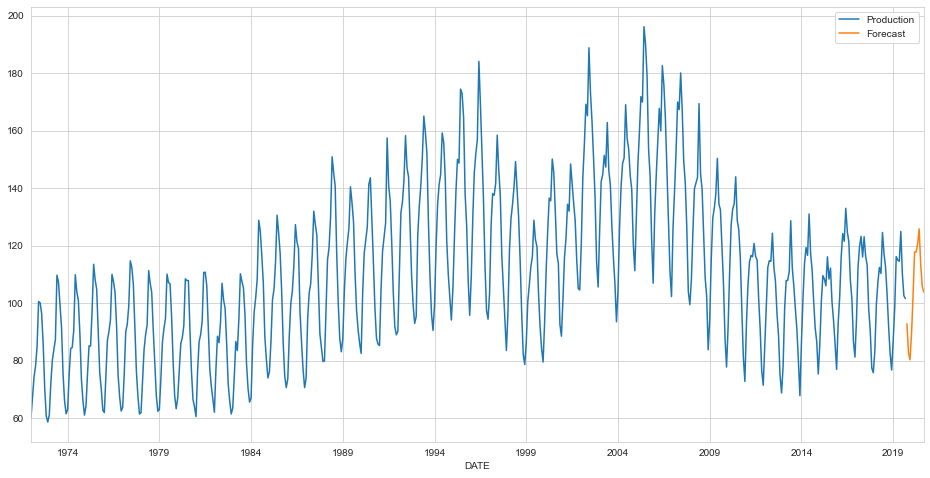

In [52]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 620.0)

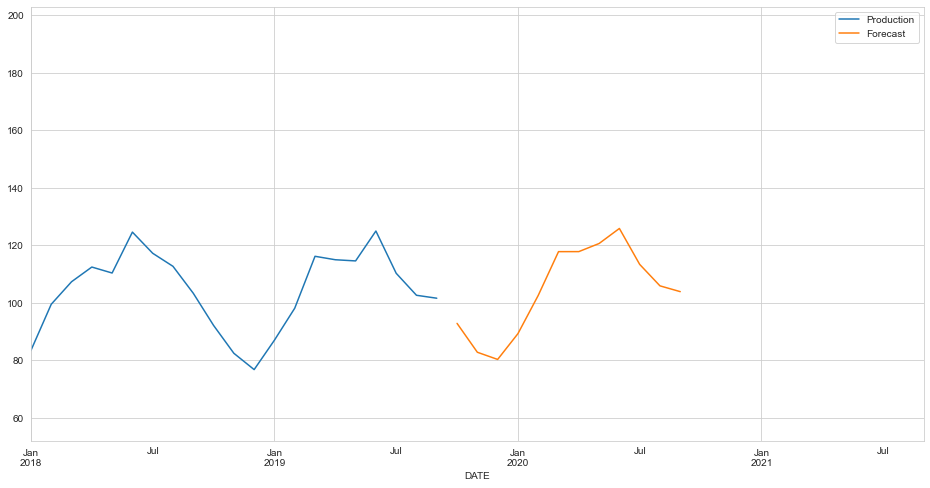

In [53]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2021-09-01')

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___